# 3 围绕半圆定律
随机矩阵理论（RMT）领域涉及具有独立随机元素的某些矩阵的行为。
RMT 中的一个里程碑式的结果涉及具有正态元素的随机对称矩阵的特征值
的行为。在适当的缩放下，这样一个矩阵的特征值的联合分布在半圆定律
下，其密度为
也就是说，具有随机正态元素的对称矩阵将具有特征值，其直方图看起
来越来越像一个半径为 2 的半圆，随着 n 增加到 ∞。特别地，阵值随机变量 Z ∈ Rn×n，通过为所有 1 ≤ i ≤ j ≤ n 生成独立正态分布的
Zi,j = Zj,i，均值为 0，方差为 1/n，并设置 Zj,i = Zi,j 对于 1 ≤ j ≤ i ≤ n。
然后矩阵 Z ∈ Rn×n 被称为 Wigner 矩阵。定义一个矩


1. 定义一个函数 wigner_density，它接受一个数字（整数或浮点数）作为
其输入，并返回一个浮点数作为其输出，由在输入处评估的半圆密度
的值给出。也就是说，对于一个数字 x，wigner_density(x) 应该返回
f(x)，其中 f 在上面的方程（1）中定义。您不需要在此函数中执行任何
错误检查，但请注意，您的函数应该同样适用于 Python 整数/浮点数
和 numpy 整数/浮点数，并且您应该能够在不检查输入类型的情况下
实现这一点。使用 numpy.sqrt 函数进行平方根计算，而不是 Python
的 math.sqrt 函数。

In [170]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eigvalsh  # 计算对称矩阵的特征值

def wigner_density(x):
    """
    半圆定律的密度函数：f(x) = (2 / π) * sqrt(1 - (x/2)^2)，定义域为 |x| <= 2。
    超出范围时返回 0。
    """
    if np.abs(x) > 2:
        return 0.0
    return (2 / np.pi) * np.sqrt(1 - (x / 2) ** 2)

2. 定义一个函数 generate_wigner，它接受一个正整数 n 作为其参数，并
返回一个随机的 n*n 的 Wigner 矩阵。如果输入不是整数或不是正数，
您的函数应该引发适当的错误。您的函数的输出可以是 numpy 矩阵或
仅仅是 numpy 数组。

In [172]:
def generate_wigner(n):
    """
    生成 n x n 的 Wigner 矩阵，其中每个上三角元素来自 N(0, 1/n)，
    并设置 Z[i, j] = Z[j, i]。
    如果 n 不是正整数，则引发 ValueError。
    """
    if not isinstance(n, int) or n <= 0:
        raise ValueError("n 必须是一个正整数")

    Z = np.random.normal(0, 1 / np.sqrt(n), size=(n, n))
    Z = (Z + Z.T) / 2  # 确保矩阵是对称的
    return Z

3. 上面引用的 RMT 结果表明，随机 Wigner 矩阵的特征值的联合分布
在半圆定律下收敛。编写一个函数 get_spectrum，它接受一个 numpy
矩阵或二维 numpy 数组，并返回一个 numpy 数组，包含其特征值按
非递减顺序排列。您不需要为此函数执行任何错误检查。


In [174]:
def get_spectrum(matrix):
    """
    返回矩阵的特征值，并按非递减顺序排列。
    """
    return np.sort(eigvalsh(matrix))

4. 创建一个包含四个子图的图表，垂直排列，每个子图显示一个（标准
化的）直方图，蓝色，显示随机 n ∗ n Wigner 矩阵的特征值，对于
n = 100, 200, 500 和 1000。在每个子图中，叠加一个表示半圆定律
密度的红色曲线，如（1）中定义。提示：取决于您如何实现上面的
wigner_density，您可能会发现 numpy.vectorize 函数很有帮助。n 需
要多大，半圆定律才能很好地拟合？当然，在实践中，我们会用更严
格的，例如，Kolmogorov-Smirnov 检验来回答这个问题，您可以在
scipy.stats 模块中找到，但这完全是可选的。注意：这个实验涉及一些
矩阵特征值计算。如果您将 n 设置得大于大约 5000，那么请准备好等
待几分钟才能得到答案，尤其是如果您在笔记本电脑上运行的话。

In [176]:
def plot_histogram_with_density(n, ax):
    """
    绘制 n x n Wigner 矩阵的特征值直方图，并叠加半圆密度曲线。
    """
    matrix = generate_wigner(n)
    spectrum = get_spectrum(matrix)

    # 绘制特征值的直方图
    ax.hist(spectrum, bins=50, density=True, alpha=0.6, color='b', label=f'n = {n}')

    # 绘制半圆密度曲线
    x = np.linspace(-2, 2, 1000)
    y = np.vectorize(wigner_density)(x)
    ax.plot(x, y, 'r-', lw=2, label='半圆定律密度')

    ax.legend()
    ax.set_title(f'Wigner 矩阵特征值的分布 (n = {n})')
    

C:\Users\29282\AppData\Local\Temp\ipykernel_29600\1792171045.py:7: UserWarning: Glyph 30697 (\N{CJK UNIFIED IDEOGRAPH-77E9}) missing from current font.
  plt.tight_layout()
C:\Users\29282\AppData\Local\Temp\ipykernel_29600\1792171045.py:7: UserWarning: Glyph 38453 (\N{CJK UNIFIED IDEOGRAPH-9635}) missing from current font.
  plt.tight_layout()
C:\Users\29282\AppData\Local\Temp\ipykernel_29600\1792171045.py:7: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from current font.
  plt.tight_layout()
C:\Users\29282\AppData\Local\Temp\ipykernel_29600\1792171045.py:7: UserWarning: Glyph 24449 (\N{CJK UNIFIED IDEOGRAPH-5F81}) missing from current font.
  plt.tight_layout()
C:\Users\29282\AppData\Local\Temp\ipykernel_29600\1792171045.py:7: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from current font.
  plt.tight_layout()
C:\Users\29282\AppData\Local\Temp\ipykernel_29600\1792171045.py:7: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing fr

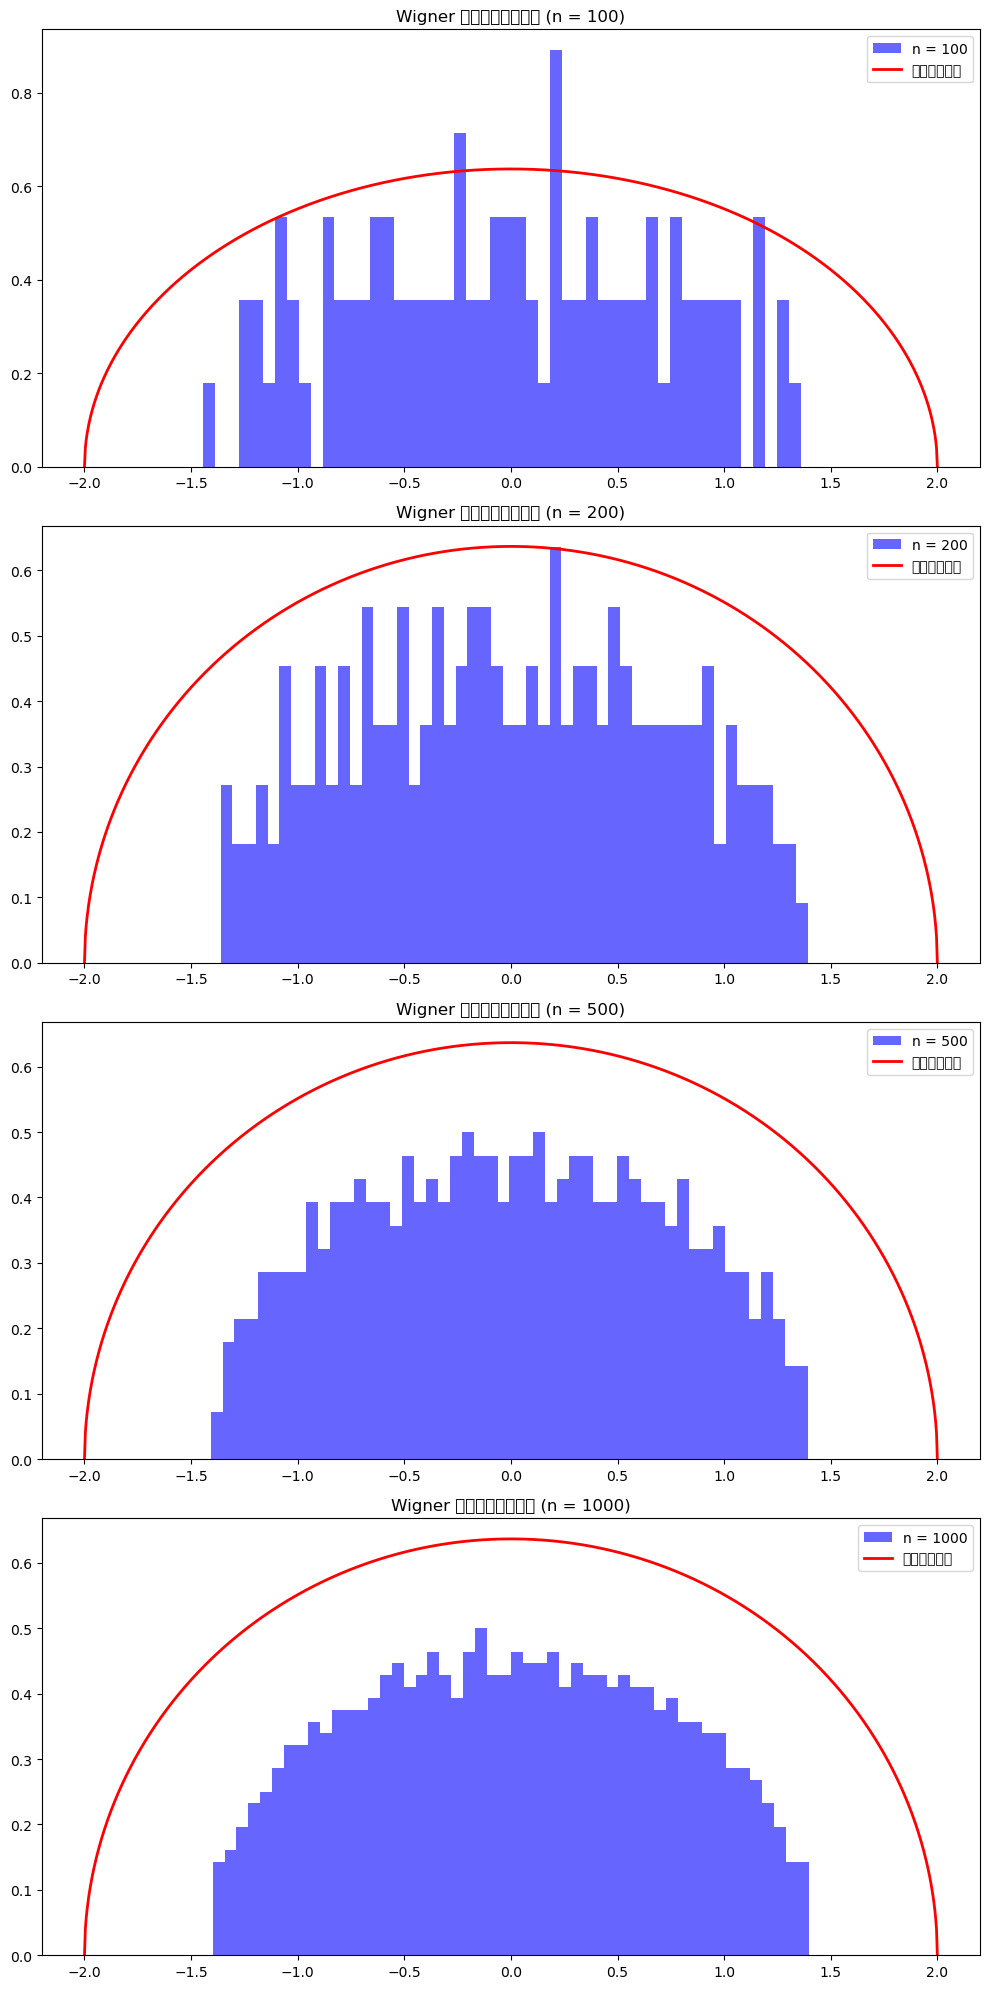

In [177]:
# 创建包含四个子图的图表，分别绘制 n = 100, 200, 500, 1000 时的结果
fig, axes = plt.subplots(4, 1, figsize=(10, 20))

for i, n in enumerate([100, 200, 500, 1000]):
    plot_histogram_with_density(n, axes[i])

plt.tight_layout()
plt.show()

# 4 Conway 的生命游戏
Conway 的生命游戏是由数学家 John Conway 设计的元胞自动机的经
典示例。该游戏是简单规则如何产生复杂行为的经典示例。游戏在一个 mby-n
的棋盘上进行，我们将将其表示为一个 m-by-n 的矩阵。游戏按步骤进
行。在任何给定时间，棋盘上的每个单元格（即，我们矩阵的条目），要么
是活的（我们将用 1 表示），要么是死的（我们将用 0 表示）。在每一步，棋
盘根据一些简单规则发展：
• 活细胞，如果少于两个活邻居，变成死细胞。
• 活细胞，如果多于三个活邻居，变成死细胞。
• 活细胞，如果有两个或三个活邻居，保持活着。
• 死细胞，如果正好有三个活邻居，就变成活的。
• 所有其他死细胞保持死亡状态。
细胞的邻居是它旁边的 8 个细胞，即左、右、上、下、左上、左下、右
上和右下。我们将遵循棋盘是环形的约定，因此使用矩阵状的符号（即，单
元格（0,0）在棋盘的左上角，第一个坐标指定行），单元格（0,0）的上一个
邻居是（m − 1, 0），单元格（m − 1, n − 1）的右边邻居是（m − 1, 0），等
等。也就是说，棋盘“环绕”。注意：您不需要使用这种矩阵状索引。这只
是我选择用来解释环形属性的。

1. 编写一个函数 is_valid_board，它接受一个 m-by-n numpy 数组（即，
一个 ndarray）作为其唯一参数，并返回一个 Python 布尔值，如果参
数是生命游戏棋盘的有效表示，则为 True。

In [180]:
import numpy as np

def is_valid_board(board):
    # 检查是否为二维数组
    if board.ndim != 2:
        return False
    
    # 检查数组中的元素是否只包含 0 或 1
    if not np.all(np.isin(board, [0, 1])):
        return False
    
    return True


2. 编写一个名为 gol_step 的函数，它接受一个 m-by-n numpy 数组作为
其参数，并返回另一个相同大小的 numpy 数组（即，也是 m-by-n），
对应于游戏的下一步棋盘。您的函数应该执行错误检查，以确保提供
的参数是有效的生命游戏棋盘。

In [182]:
def gol_step(board):
    # 检查是否是有效的棋盘
    if not is_valid_board(board):
        raise ValueError("Provided board is not a valid game of life board.")
    
    # 获取棋盘的行数和列数
    m, n = board.shape
    
    # 创建一个与原棋盘大小相同的零数组，用于存储下一步的棋盘状态
    new_board = np.zeros((m, n), dtype=int)
    
    # 遍历棋盘上的每个单元格
    for i in range(m):
        for j in range(n):
            # 计算每个单元格周围的活细胞数量
            # 使用 modulo 操作来实现环形棋盘
            live_neighbors = sum([
                board[(i-1) % m, (j-1) % n], board[(i-1) % m, j], board[(i-1) % m, (j+1) % n],
                board[i, (j-1) % n], board[i, (j+1) % n],
                board[(i+1) % m, (j-1) % n], board[(i+1) % m, j], board[(i+1) % m, (j+1) % n]
            ])
            
            # 应用生命游戏的规则
            if board[i, j] == 1:
                if live_neighbors < 2 or live_neighbors > 3:
                    new_board[i, j] = 0
                else:
                    new_board[i, j] = 1
            else:
                if live_neighbors == 3:
                    new_board[i, j] = 1
                else:
                    new_board[i, j] = 0
    
    return new_board


3. 编写一个名为 draw_gol_board 的函数，它接受一个 m-by-n numpy 数
组（即，一个 ndarray）作为其唯一参数，并绘制棋盘作为一组 m-by-n
的瓦片，活细胞和死细胞分别对应黑色或白色。您的图表不应该有任何
网格线，也不应该有轴标签或轴刻度。提示：参见函数 plt.xticks(plt.yticks()，用于更改轴刻度。提示：您可能会发现函数 plt.get_cmap
在处理 matplotlib Colormap 对象时很有用。
) 和

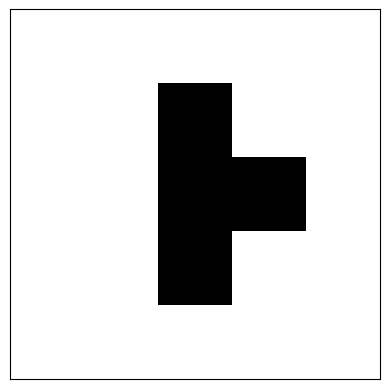

In [184]:
import matplotlib.pyplot as plt

def draw_gol_board(board):
    # 获取棋盘的行数和列数
    m, n = board.shape
    
    # 使用灰度色图，其中活细胞（1）为黑色，死细胞（0）为白色
    cmap = plt.get_cmap('gray_r')
    
    # 绘制棋盘
    plt.imshow(board, cmap=cmap, interpolation='nearest')
    
    # 移除轴标签和刻度
    plt.xticks([])
    plt.yticks([])
    
    # 显示图像
    plt.show()

# 示例：创建一个简单的生命游戏棋盘并绘制它
sample_board = np.array([
    [0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0],
    [0, 0, 1, 1, 0],
    [0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0]
])

draw_gol_board(sample_board)


4. 创建一个 20-by-20 的 numpy 数组，对应于一个生命游戏棋盘，其中
所有细胞都死亡，除了左上角的 5-by-5 部分看起来像这样：绘制这个
20-by-20 棋盘，使用 draw_gol_board。


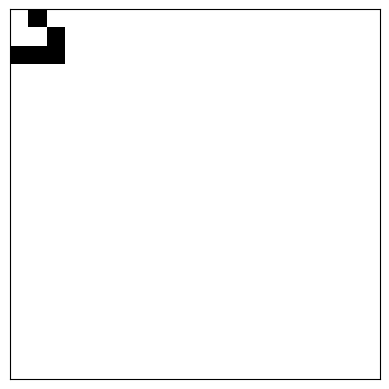

In [186]:
board = np.zeros((20, 20), dtype=int)
glider = np.array([
    [0, 1, 0, 0, 0],
    [0, 0, 1, 0, 0],
    [1, 1, 1, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0]
])
board[:5, :5] = glider
draw_gol_board(board)

5.生成一个包含5个子图的图，以5-by-1网格排列，显示从您刚刚创建的棋盘开始的生命游戏的前五步，步骤从上到下排列，5-by-5子棋盘上的图形称为滑翔机，它很有趣，因为，正如您从图表中看到的，它似乎在棋盘上移动，当您运行游戏时。lt.show()


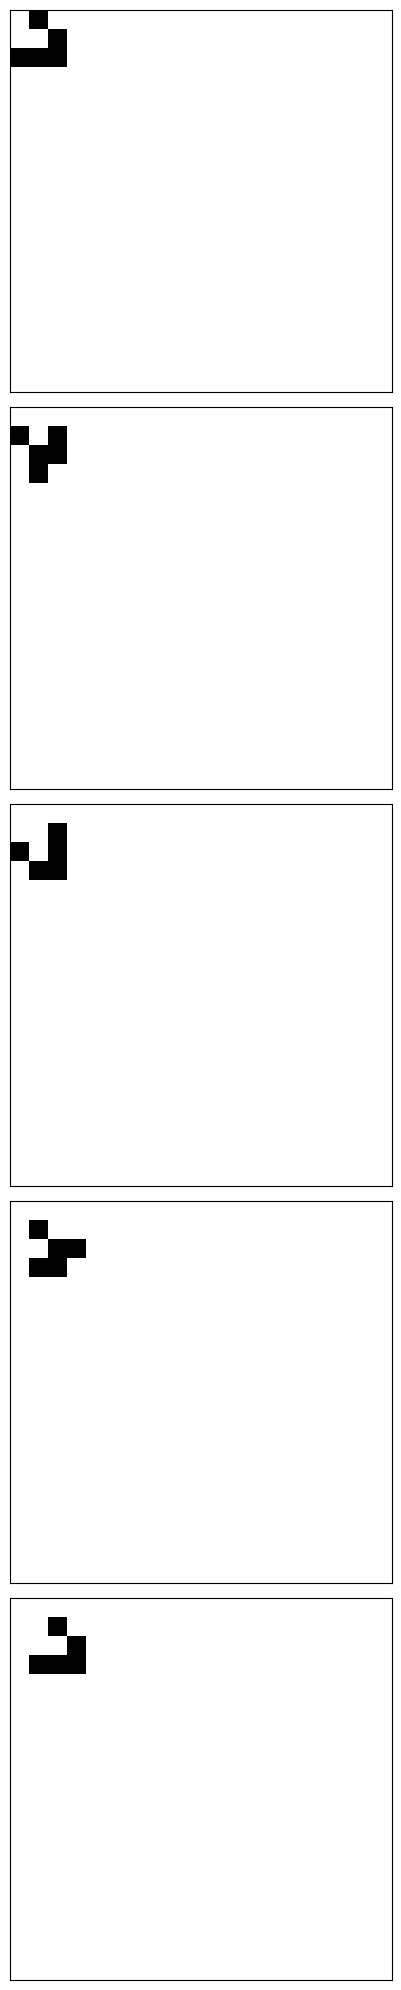

In [188]:
# 定义一个函数来执行生命游戏的单步演化
def gol_step(board):
    """执行生命游戏的单步演化"""
    m, n = board.shape
    new_board = np.zeros((m, n), dtype=int)
    for i in range(m):
        for j in range(n):
            # 计算周围的活细胞数量
            total = (board[(i-1)%m, (j-1)%n] + board[(i-1)%m, j] + board[(i-1)%m, (j+1)%n] +
                     board[i, (j-1)%n] + board[i, (j+1)%n] +
                     board[(i+1)%m, (j-1)%n] + board[(i+1)%m, j] + board[(i+1)%m, (j+1)%n])
            # 应用生命游戏的规则
            if board[i, j] == 1:
                new_board[i, j] = 1 if total in [2, 3] else 0
            else:
                new_board[i, j] = 1 if total == 3 else 0
    return new_board

# 创建一个新棋盘来保存生命游戏的步骤
steps_board = np.zeros((5, 20, 20), dtype=int)
steps_board[0] = board  # 初始化第一步

# 计算接下来的四步
for i in range(1, 5):
    steps_board[i] = gol_step(steps_board[i-1])

# 绘制生命游戏的五步
plt.figure(figsize=(8, 20))  # 设置图像大小
for i in range(5):
    plt.subplot(5, 1, i+1)  # 创建5个子图
    plt.imshow(steps_board[i], cmap='binary')  # 显示每个步骤的棋盘
    plt.xticks([])  # 隐藏x轴刻度
    plt.yticks([])  # 隐藏y轴刻度
plt.tight_layout()  # 调整子图间距
plt.show()
